<a href="https://colab.research.google.com/github/zelal-Eizaldeen/DLH-Lab1-CS598/blob/main/Lab1_Lineaegession.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Start 20/1/2025

##Lab 1
This very first lab will introduce to some PyTorch basics including Tensors, Loss, and Autograd. Hopefully, we will start to get familar with PyTorch. In the end, we will implement a linear regression model from sratch with some synthetic data.

Table of Contents:

- Tensors
- Loss
- Autograd
- Assignment
# Some contents of this lab are adapted from Dive into Deep Learning
https://d2l.ai/
 and Official PyTorch Tutorials
 https://pytorch.org/tutorials/
 .


In [2]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
# set seed
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
os.environ["PYTHONHASHSEED"] = str(seed)

#If PYTHONHASHSEED is set to an integer value, it is used as a fixed seed for generating the hash() of the types covered by the hash randomization.
#Its purpose is to allow repeatable hashing, such as for selftests for the interpreter itself, or to allow a cluster of python processes to share hash values.

#1. Tensors
Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators. Tensors are also optimized for automatic differentiation (we’ll see more about that later in the Autograd section).

#1.1 Initializing a Tensor
Tensors can be initialized in various ways. Take a look at the following examples:

**Directly from data**

Tensors can be created directly from data. The data type is automatically inferred.

In [ ]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

**From a NumPy array**

Tensors can be created from NumPy arrays (and vice versa).

In [ ]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

**From another tensor:**

The new tensor retains the properties (shape, datatype) of the argument tensor, unless explicitly overridden.

In [ ]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.3904, 0.6009],
        [0.2566, 0.7936]]) 



**With random or constant values:**

shape is a tuple of tensor dimensions. In the functions below, it determines the dimensionality of the output tensor.

In [ ]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.9408, 0.1332, 0.9346],
        [0.5936, 0.8694, 0.5677]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


#1.2 Attributes of a Tensor
Tensor attributes describe their shape, datatype, and the device on which they are stored.

In [ ]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


#1.3 Operations on Tensors
Over 100 tensor operations, including arithmetic, linear algebra, matrix manipulation (transposing, indexing, slicing), sampling and more are comprehensively described here.

Let us try out some of the operations from the list. They are pretty similar to the NumPy API.

Standard numpy-like indexing and slicing:

In [ ]:
tensor = torch.arange(12).reshape(3, 4).float()
print(tensor)
print('First row: ',tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[:, -1])

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])
First row:  tensor([0., 1., 2., 3.])
First column:  tensor([0., 4., 8.])
Last column: tensor([ 3.,  7., 11.])


#Joining tensors

You can use torch.cat to concatenate a sequence of tensors along a given dimension. See also torch.stack, another tensor joining op that is subtly different from torch.cat.

In [ ]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[ 0.,  1.,  2.,  3.,  0.,  1.,  2.,  3.,  0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.,  4.,  5.,  6.,  7.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.,  8.,  9., 10., 11.,  8.,  9., 10., 11.]])


#Arithmetic operations

In [ ]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
y1 = tensor @ tensor.T
print(y1)
y2 = tensor.matmul(tensor.T)
print(y2)
y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)
print(y3)

tensor([[ 14.,  38.,  62.],
        [ 38., 126., 214.],
        [ 62., 214., 366.]])
tensor([[ 14.,  38.,  62.],
        [ 38., 126., 214.],
        [ 62., 214., 366.]])
tensor([[ 14.,  38.,  62.],
        [ 38., 126., 214.],
        [ 62., 214., 366.]])


<ipython-input-15-0a3126678d1d>:7: UserWarning: An output with one or more elements was resized since it had shape [3, 4], which does not match the required output shape [3, 3]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at ../aten/src/ATen/native/Resize.cpp:28.)
  torch.matmul(tensor, tensor.T, out=y3)


In [ ]:
# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
print(z1)
z2 = tensor.mul(tensor)
print(z2)
z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)
print(z3)

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.]])
tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.]])
tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.]])


#Single-element tensors

If you have a one-element tensor, for example by aggregating all values of a tensor into one value, you can convert it to a Python numerical value using item():

In [ ]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

66.0 <class 'float'>


#1.4 GPU Acceleration
If we have NVIDIA GPU(s), we can accelerate computation once we move Tensors onto GPU. Let's compare how much GPU can accelerate especially matrix operations. We will do a matrix-matrix multiplication between two 5k-by-5k matrices on both CPU and GPU.

Unfortunately, Coursera does not have a GPU environment. But feel free to try the following snippets on a GPU machine. Ideally, with GPU acceleration, matrix multiplication will be much faster.

In [ ]:
mat = torch.rand(5000, 5000)
mat

tensor([[0.0050, 0.3068, 0.1165,  ..., 0.8682, 0.9359, 0.3523],
        [0.3625, 0.6611, 0.9405,  ..., 0.2253, 0.1223, 0.3749],
        [0.0625, 0.7350, 0.2795,  ..., 0.3591, 0.8405, 0.0811],
        ...,
        [0.5278, 0.6374, 0.7694,  ..., 0.1535, 0.5840, 0.5886],
        [0.7199, 0.2088, 0.5554,  ..., 0.7190, 0.3847, 0.2292],
        [0.5782, 0.3167, 0.9537,  ..., 0.3104, 0.2277, 0.4262]])

In [ ]:
%%time
torch.mm(mat.t(), mat)

CPU times: user 3.86 s, sys: 178 ms, total: 4.04 s
Wall time: 4.27 s


tensor([[1637.8097, 1238.1947, 1229.9082,  ..., 1217.0516, 1244.5264,
         1241.2983],
        [1238.1947, 1662.4774, 1262.2449,  ..., 1239.7295, 1249.1700,
         1251.8939],
        [1229.9082, 1262.2449, 1680.7303,  ..., 1248.0908, 1270.0355,
         1241.9963],
        ...,
        [1217.0519, 1239.7296, 1248.0909,  ..., 1655.5070, 1247.3108,
         1249.6636],
        [1244.5264, 1249.1700, 1270.0354,  ..., 1247.3108, 1657.7535,
         1250.5935],
        [1241.2982, 1251.8938, 1241.9965,  ..., 1249.6636, 1250.5935,
         1668.3043]])

In [ ]:
%%time
if torch.cuda.is_available():
    mat = mat.cuda()
    torch.mm(mat.t(), mat)
else:
    print('GPU is not available!')

GPU is not available!
CPU times: user 3.4 ms, sys: 0 ns, total: 3.4 ms
Wall time: 11.2 ms


# Exercise 1 [10 points]
Implement the Sigmoid function on your own.

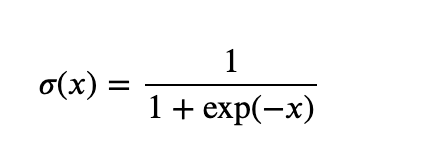


Note that you should not use existing PyTorch implementation.

Hint: try torch.exp().

In [ ]:
def sigmoid(x):
    # your code here
    return 1/(1+torch.exp(-x))
    raise NotImplementedError

In [ ]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''

assert torch.allclose(sigmoid(torch.tensor([1.2])), torch.tensor([0.7685]), rtol=1e-2)
assert torch.allclose(sigmoid(torch.tensor([0, 1.5])), torch.tensor([0.5000, 0.8176]), rtol=1e-2)

#Exercise 2 [10 points]
Implement a Softmax function on your own.
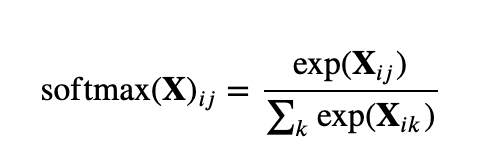


Note that you should not use existing PyTorch implementation.

Hint: try torch.exp() and torch.sum().

#note_zilal
- dim=0: Operate along rows (column-wise operations).
- dim=1: Operate along columns (row-wise operations in 2D).

In [ ]:
def softmax(X):
    # your code here
    exp_X = torch.exp(X)  # Element-wise exponentiation
    sum_exp_X = torch.sum(exp_X, dim=-1, keepdim=True)  # Sum along the last dimension
    return exp_X / sum_exp_X
    raise NotImplementedError

In [ ]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''

X = torch.tensor([[0.2288, 0.4111, 0.0385], [0.6233, 0.0364, 0.1999]])
assert torch.allclose(softmax(X), torch.tensor([[0.3304, 0.3965, 0.2731], [0.4523, 0.2515, 0.2962]]), rtol=1e-2)


# Exercise 3 [10 points]
Implement a linear layer.

𝐎=𝐗𝐖+𝐛,


where  𝐗
  is the input feature,  𝐎
  is the output feature,  𝐖
  and  𝐛
  are the weight parameters.

Hint: try torch.matmul().

In [ ]:
def linear(X, W, b):
    # your code here
    return X.matmul(W) + b
    raise NotImplementedError

In [ ]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''

X = torch.Tensor([[0.1, 0.2, 0.3]])
W = torch.Tensor([[0.1, 0.2, 0.3]]).T
b = torch.Tensor([-0.5])
assert torch.allclose(linear(X, W, b), torch.Tensor([[-0.3600]]), rtol=1e-2)

#2. Loss
When presented with some training data, our untrained network is likely not to give the correct answer. Loss function measures the degree of dissimilarity of obtained result to the target value, and it is the loss function that we want to minimize during training. To calculate the loss we make a prediction using the inputs of our given data sample and compare it against the true data label value.

Common loss functions include nn.MSELoss (Mean Square Error) for regression tasks, and nn.NLLLoss (Negative Log Likelihood) for classification. nn.CrossEntropyLoss combines nn.LogSoftmax and nn.NLLLoss. nn.BCELoss is specially designed for binary classification.

Mean Square Error

The most popular loss function in regression problems is the squared error. When our prediction for an example 𝑖
 is 𝑦̂ (𝑖)
 and the corresponding true label is 𝑦(𝑖)
, the squared error is given by:
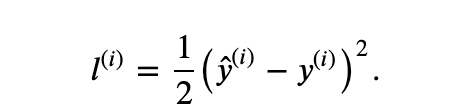

To measure the quality of a model on the entire dataset of  𝑛
  examples, we simply average (or equivalently, sum) the losses on the training set.
  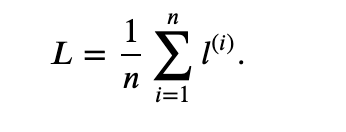

In [ ]:
def squared_loss(y_hat, y):
    return ((y_hat - y.reshape(y_hat.shape)) ** 2 / 2).mean()

In [ ]:
y_hat = torch.tensor([0.5, 0.8, 0.2])
y = torch.tensor([1.0, 1.0, 0.0])
squared_loss(y_hat, y)

tensor(0.0550)

#Exercise 4 [10 points]
Implement the cross-entropy loss function on your own.
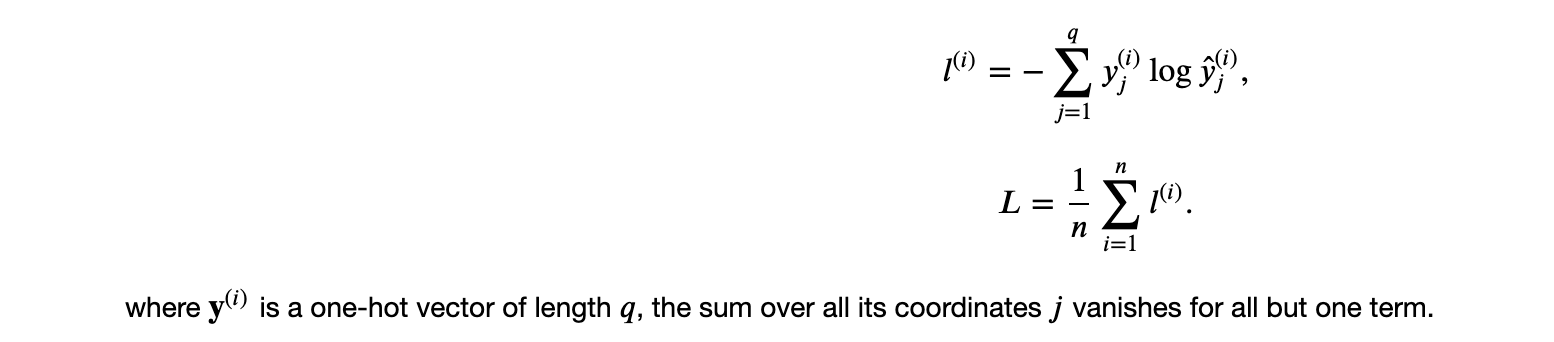

Note that you should not use existing PyTorch implementation.

Hint: try torch.log().

In [ ]:
def cross_entropy(y_hat, y):
    # your code here
    sum_y_log_y_hat = torch.sum(y * torch.log(y_hat), dim=-1, keepdim=True)
    return -sum_y_log_y_hat.mean()
    raise NotImplementedError

In [ ]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''

y = torch.tensor([[1, 0, 0], [0, 0, 1]])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
assert torch.allclose(cross_entropy(y_hat, y), torch.tensor([1.4979]), rtol=1e-2)

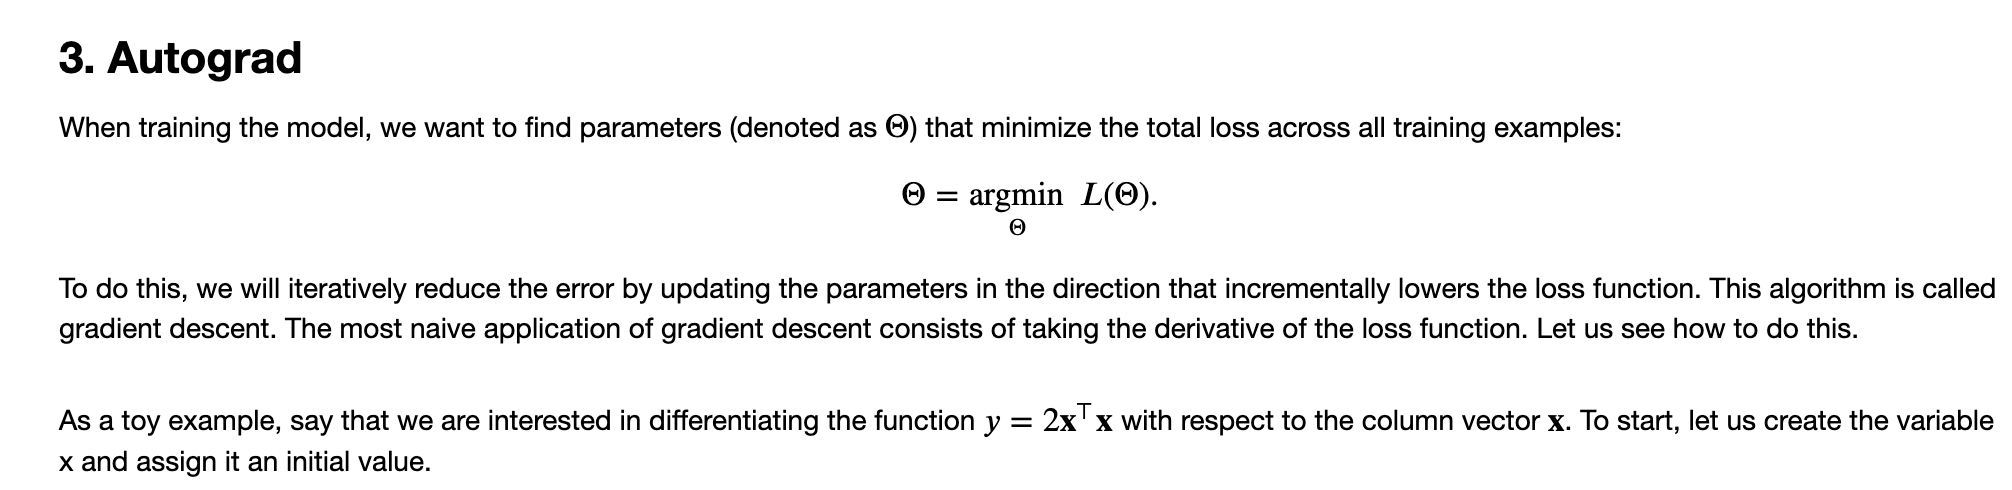

In [ ]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [ ]:
x.requires_grad_(True)  # Same as `x = torch.arange(4.0, requires_grad=True)`
x.grad  # The default value is None

Now let us calculate  𝑦
 .

In [ ]:
y = 2 * torch.dot(x, x)
y
#Zilal_note: Dot product=0.0 +1.1+2.2+3.3=14.  torch.dot(x, x)

tensor(28., grad_fn=<MulBackward0>)

Since  𝐱
  is a vector of length 4, an inner product of  𝐱
  and  𝐱
  is performed, yielding the scalar output that we assign to  𝑦
 . Next, we can automatically calculate the gradient of  𝑦
  with respect to each component of  𝐱
  by calling the function for backpropagation and printing the gradient.

In [ ]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

The gradient of the function  𝑦=2𝐱⊤𝐱
  with respect to  𝐱
  should be  4𝐱
 . Let us quickly verify that our desired gradient was calculated correctly.

In [ ]:
x.grad == 4 * x

tensor([True, True, True, True])

#Exercise 5 [10 points]
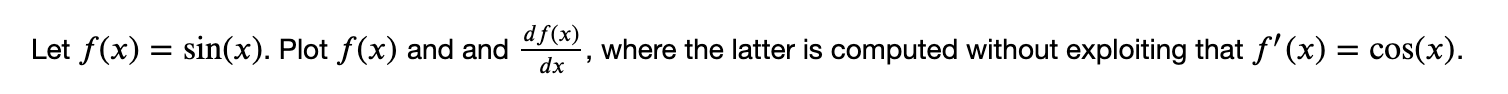

In [ ]:
x = np.linspace(-np.pi, np.pi, 100)
x = torch.tensor(x, requires_grad=True)
y = torch.sin(x)

# your code here
# Provide a gradient vector for y (e.g., ones for sum-like behavior)
gradient = torch.ones_like(y)  # Same shape as y
y.backward(gradient=gradient)
x.grad


torch.Size([100])


tensor([-1.0000, -0.9980, -0.9920, -0.9819, -0.9679, -0.9501, -0.9284, -0.9029,
        -0.8738, -0.8413, -0.8053, -0.7660, -0.7237, -0.6785, -0.6306, -0.5801,
        -0.5272, -0.4723, -0.4154, -0.3569, -0.2969, -0.2358, -0.1736, -0.1108,
        -0.0476,  0.0159,  0.0792,  0.1423,  0.2048,  0.2665,  0.3271,  0.3863,
         0.4441,  0.5000,  0.5539,  0.6056,  0.6549,  0.7015,  0.7453,  0.7861,
         0.8237,  0.8580,  0.8888,  0.9161,  0.9397,  0.9595,  0.9754,  0.9874,
         0.9955,  0.9995,  0.9995,  0.9955,  0.9874,  0.9754,  0.9595,  0.9397,
         0.9161,  0.8888,  0.8580,  0.8237,  0.7861,  0.7453,  0.7015,  0.6549,
         0.6056,  0.5539,  0.5000,  0.4441,  0.3863,  0.3271,  0.2665,  0.2048,
         0.1423,  0.0792,  0.0159, -0.0476, -0.1108, -0.1736, -0.2358, -0.2969,
        -0.3569, -0.4154, -0.4723, -0.5272, -0.5801, -0.6306, -0.6785, -0.7237,
        -0.7660, -0.8053, -0.8413, -0.8738, -0.9029, -0.9284, -0.9501, -0.9679,
        -0.9819, -0.9920, -0.9980, -1.00

In [ ]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''

assert torch.allclose(x.grad[10].float(), torch.Tensor([-0.8053]), rtol=1e-2)
assert torch.allclose(x.grad[50].float(), torch.Tensor([0.9995]), rtol=1e-2)

## Assignment [50 points]
Now, you understand the basics of PyTorch. Let us implement an entire method from scratch, including the data pipeline, the linear model, the loss function, and the gradient descent optimizer. While modern deep learning frameworks can automate nearly all of this work, implementing things from scratch is the only way to make sure that you really know what you are doing. Moreover, when it comes time to customize models, defining our own layers or loss functions, understanding how things work under the hood will prove handy. In this section, we will rely only on tensors and auto differentiation. Afterwards, we will introduce a more concise implementation, taking advantage of bells and whistles of deep learning frameworks.

To keep things simple, we will construct an artificial dataset according to a linear model with additive noise. Our task will be to recover this model’s parameters using the finite set of examples contained in our dataset. We will keep the data low-dimensional so we can visualize it easily. In the following code snippet, we generate a dataset containing 1000 examples, each consisting of 2 features sampled from a standard normal distribution. Thus our synthetic dataset will be a matrix
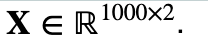

The true parameters generating our dataset will be  𝐰=[2,−3.4]⊤ and  𝑏=4.2
 , and our synthetic labels will be assigned according to the following linear model with the noise term  𝜖
 :
𝐲=𝐗𝐰+𝑏+𝜖.

In [4]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [5]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([1.9269, 1.4873]) 
label: tensor([2.9871])


#Reading the Dataset
Recall that training models consists of making multiple passes over the dataset, grabbing one minibatch of examples at a time, and using them to update our model. Since this process is so fundamental to training machine learning algorithms, it is worth defining a utility function to shuffle the dataset and access it in minibatches.

In the following code, we define the data_iter function to demonstrate one possible implementation of this functionality. The function takes a batch size, a matrix of features, and a vector of labels, yielding minibatches of the size batch_size. Each minibatch consists of a tuple of features and labels.

In [6]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In general, note that we want to use reasonably sized minibatches to take advantage of the GPU hardware, which excels at parallelizing operations. Because each example can be fed through our models in parallel and the gradient of the loss function for each example can also be taken in parallel, GPUs allow us to process hundreds of examples in scarcely more time than it might take to process just a single example.

To build some intuition, let us read and print the first small batch of data examples. The shape of the features in each minibatch tells us both the minibatch size and the number of input features. Likewise, our minibatch of labels will have a shape given by batch_size.

In [7]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.8913,  0.1938],
        [ 1.1740,  0.7011],
        [ 0.0521,  0.2882],
        [ 0.0203,  0.9289],
        [ 2.2181,  0.5232],
        [ 1.3062, -0.9276],
        [ 1.2888,  0.0523],
        [-0.3609,  0.1046],
        [-0.1162,  1.3705],
        [ 1.3200, -1.5197]]) 
 tensor([[ 1.7636],
        [ 4.1663],
        [ 3.3237],
        [ 1.0761],
        [ 6.8625],
        [ 9.9751],
        [ 6.6153],
        [ 3.1177],
        [-0.7020],
        [12.0038]])


As we run the iteration, we obtain distinct minibatches successively until the entire dataset has been exhausted (try this). While the iteration implemented above is good for didactic purposes, it is inefficient in ways that might get us in trouble on real problems. For example, it requires that we load all the data in memory and that we perform lots of random memory access. The built-in iterators implemented in a deep learning framework are considerably more efficient and they can deal with both data stored in files and data fed via data streams.

#Initializing Model Parameters [10 points]
Before we can begin optimizing our model’s parameters by minibatch stochastic gradient descent, we need to have some parameters in the first place. In the following code, we initialize weights by sampling random numbers from a normal distribution with mean 0 and a standard deviation of 0.01, and setting the bias to 0.

In [14]:
w = None # size (2,1)
b = None # size (1,)
# your code here
w = torch.normal(mean=0, std=0.01, size=(2, 1), requires_grad=True)
b = torch.zeros((1,),requires_grad=True)





tensor([0.], requires_grad=True)


In [15]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''

assert type(w) is torch.Tensor
assert type(b) is torch.Tensor
assert w.requires_grad
assert b.requires_grad

#Defining the Model [10 points]
Next, we must define our model, relating its inputs and parameters to its outputs. Recall that to calculate the output of the linear model, we simply take the matrix-vector dot product of the input features  𝐱
  and the model weights  𝐰
  , and add the offset  𝑏
  to each example.

This is exactly the same as what we implemented in Exercise 3.

In [16]:
def linear(X, W, b):
    # your code here
    return X.matmul(W) + b
    raise NotImplementedError


In [17]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''

X_ = torch.Tensor([[0.1, 0.2, 0.3]])
W_ = torch.Tensor([[0.1, 0.2, 0.3]]).T
b_ = torch.Tensor([-0.5])
assert torch.allclose(linear(X_, W_, b_), torch.Tensor([[-0.3600]]), rtol=1e-2)


#Defining the Loss Function [10 points]
Since updating our model requires taking the gradient of our loss function, we ought to define the loss function first. Here we will use the squared loss function (remember use 1/2 * (a-b)^2).

In [18]:
def squared_loss(y_hat, y):
    # your code here
   return ((y_hat - y.reshape(y_hat.shape)) ** 2 / 2).mean()

In [19]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''

y = torch.tensor([2, 0.4, 1.1, 2.1])
y_hat = torch.tensor([[2.1, 0.3, 1.2, 2.5]])
assert torch.allclose(squared_loss(y_hat, y), torch.tensor([0.0238]), rtol=1e-2)

#Defining the Optimization Algorithm [10 points]
Though linear regression has a closed-form solution, we will take this opportunity to introduce your first working example of minibatch stochastic gradient descent.

At each step, using one minibatch randomly drawn from our dataset, we will estimate the gradient of the loss with respect to our parameters. Next, we will update our parameters in the direction that may reduce the loss. The following code applies the minibatch stochastic gradient descent update, given a set of parameters, a learning rate, and a batch size. The size of the update step is determined by the learning rate lr. Because our loss is calculated as a sum over the minibatch of examples, we normalize our step size by the batch size (batch_size), so that the magnitude of a typical step size does not depend heavily on our choice of the batch size.

In [20]:
def sgd(params, lr, batch_size):
    """  Minibatch stochastic gradient descent """
    with torch.no_grad():
        for param in params:
            """
            TODO: perform a step gradient descent
                  param = param - lr * grad
            """
            # your code here
            param -= lr * param.grad / batch_size

            param.grad.zero_()

In [21]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''

m = torch.ones(1, requires_grad=True)
n = 2 * m
n.backward()
sgd([m], lr=0.1, batch_size=1)
assert torch.allclose(m, torch.tensor([0.8000]), rtol=1e-2)

#Training [10 points]
Now that we have all of the parts in place, we are ready to implement the main training loop. It is crucial that you understand this code because you will see nearly identical training loops over and over again throughout your career in deep learning.

In each iteration, we will grab a minibatch of training examples, and pass them through our model to obtain a set of predictions. After calculating the loss, we initiate the backwards pass through the network, storing the gradients with respect to each parameter. Finally, we will call the optimization algorithm sgd to update the model parameters.

In summary, we will execute the following loop:

In [22]:
lr = 0.03
num_epochs = 20
net = linear
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # Minibatch loss in `X` and `y`
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.backward()
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 8.910106
epoch 2, loss 5.012513
epoch 3, loss 2.821887
epoch 4, loss 1.589939
epoch 5, loss 0.896555
epoch 6, loss 0.505929
epoch 7, loss 0.285732
epoch 8, loss 0.161495
epoch 9, loss 0.091353
epoch 10, loss 0.051719
epoch 11, loss 0.029311
epoch 12, loss 0.016632
epoch 13, loss 0.009454
epoch 14, loss 0.005386
epoch 15, loss 0.003080
epoch 16, loss 0.001772
epoch 17, loss 0.001029
epoch 18, loss 0.000607
epoch 19, loss 0.000366
epoch 20, loss 0.000230


In [23]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 0.0111, -0.0107], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0119], grad_fn=<RsubBackward1>)


In [24]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''

assert (true_w - w.reshape(true_w.shape)).abs().mean() < 0.05
assert (true_b - b).abs() < 0.05


#Note from Zilal
- torch.no_grad() usage:
During Evaluation/Inference: You don't want to track gradients when you're just using the model for predictions. Disabling gradient tracking speeds up the evaluation process and reduces memory consumption.

When Manually Updating Parameters: When you're manually updating parameters (e.g., using your own optimization function like sgd), you don't need to track the gradient computations